In [1]:
# Vizuelna podešavanja okruženja (samo razvuče notebook na širinu ekrana)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
import pandas as pd
import pickle
with open("data_cleaned/day_routes",'rb') as file:
    dataDayRoutes=pickle.load(file)
with open("data_cleaned/routes", 'rb') as file:
    dataRoutes = pickle.load(file)
with open("data_cleaned/stops", 'rb') as file:
    dataStops = pickle.load(file)
with open("data_cleaned/trips", 'rb') as file:
    dataTrips = pickle.load(file)
with open("data_cleaned/stop_times", 'rb') as file:
    dataStopTimes = pickle.load(file)
with open("data_cleaned/stop_times2", 'rb') as file:
    dataStopTimes2 = pickle.load(file)
with open("data_cleaned/dataStopsExtra", 'rb') as file:
    dataStopsExtra = pickle.load(file)
#dataRoutes=dataRoutes[dataRoutes['route_type']!=702]
print(dataDayRoutes)

     route_id route_short_name  \
0           2                2   
1           5                5   
2           6                6   
3           7                7   
4           9                9   
..        ...              ...   
168     20407             407L   
169     20505             505R   
170     20703            703L1   
171     40101             EKO1   
172     40102             EKO2   

                                       route_long_name  route_type  
0                    Unutrašnji Krug - Spoljašnji Krug           0  
1                  Kalemegdan /Donji Grad/ - Ustanička           0  
2                                Tašmajdan - Ustanička           0  
3                                  Ustanička - Blok 45           0  
4                                    Banjica - Blok 45           0  
..                                                 ...         ...  
168                     Bela Reka - Trebež (Okretnica)         702  
169                Miljakovac 1  - Milj

In [7]:
#izdvajanje ruta u dataStopSequences bez vremena
data=dataStopTimes2.merge(dataTrips)

data=data[['stop_id','stop_sequence','route_id','direction_id']]
data1=data[data['direction_id']==0]
data2=data[data['direction_id']==1]

data1=data1.groupby(['stop_id','stop_sequence','route_id'],as_index=False).first()
data1=data1.sort_values(by=['route_id','stop_sequence'])
data2=data2.groupby(['stop_id','stop_sequence','route_id'],as_index=False).first()
data2=data2.sort_values(by=['route_id','stop_sequence'])
dataStopSequences=pd.concat([data1, data2], sort=False)
dataDayRoutesMerge=dataDayRoutes['route_id']
dataStopSequences= dataStopSequences.merge(dataDayRoutesMerge)

print(dataStopSequences)

   # print(min0,min1,max0,max1)
   # print(data1.iloc[max0],data2.iloc[max1])
    #dataStopSequences=dataStopSequences.loc[dataStopSequences['Fee'].idxmax()]

      stop_id  stop_sequence  route_id  direction_id
0           7              1         2             0
1           5              2         2             0
2          71              3         2             0
3          73              4         2             0
4          52              5         2             0
...       ...            ...       ...           ...
8116      194             12     40102             1
8117     3032             13     40102             1
8118     3141             14     40102             1
8119     2111             15     40102             1
8120      952             16     40102             1

[8121 rows x 4 columns]


In [8]:
#graf bez povezanih pocetnih i krajnjih stajalista
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
G = nx.DiGraph()
data=dataStopsExtra[['stop_id','stop_name','stop_lat','stop_lon','zone_id','tip','size']]
#print(data)
#print(dataStops.groupby(['stop_id','stop_name']).
for i in range(0,data.shape[0]):
    if (data.iloc[i]['stop_id'] in dataStopSequences['stop_id'].values):
        G.add_node(data.iloc[i]['stop_id'],name=data.iloc[i]['stop_name'],lat=data.iloc[i]['stop_lat'],lon=data.iloc[i]['stop_lon'],zone=data.iloc[i]['zone_id'],tip=data.iloc[i]['tip'],departures=data.iloc[i]['size'])


#data=dataStopTimes2.merge(dataTrips)

#data=data[['stop_id','stop_sequence','route_id']]
print(G)

last=0

for i in range(1,dataStopSequences.shape[0]):

    if (dataStopSequences.iloc[i]['stop_sequence']==1):
        last=i
    for j in range(last,i):
        if(dataStopSequences.iloc[j]['stop_id']!=dataStopSequences.iloc[i]['stop_id']):
            if((dataStopSequences.iloc[j]['stop_id'], dataStopSequences.iloc[i]['stop_id']) in G.edges):
                G.edges[dataStopSequences.iloc[j]['stop_id'], dataStopSequences.iloc[i]['stop_id']]['weight']+=1
            else:
                G.add_edge(dataStopSequences.iloc[j]['stop_id'], dataStopSequences.iloc[i]['stop_id'],weight=1)
print(G)

DiGraph with 3116 nodes and 0 edges
DiGraph with 3116 nodes and 82857 edges


In [26]:
print(nx.number_weakly_connected_components(G))
print(nx.number_strongly_connected_components(G))

1
537


In [33]:
#gustina dijametar i prosecno rastojanje mreze
print(nx.density(G))
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print(diameter)
#print(nx.diameter(G))
print(nx.average_shortest_path_length(G))

0.008537512594860679
10
3.437221135876139


In [9]:
#spajanje pocetnih i krajnjih stanica kao stampanje gustine dijamtrre i prosecngo rastojanja mreze
cnt1=0
cnt2=0
for i in range(0,dataRoutes.shape[0]):
    mask0=(dataStopSequences['route_id']==dataRoutes.iloc[i]['route_id']) & (dataStopSequences['direction_id']==0)
    mask1=(dataStopSequences['route_id']==dataRoutes.iloc[i]['route_id']) & (dataStopSequences['direction_id']==1)
    data1=dataStopSequences[mask0]
   
   
    min0=data1.query('stop_sequence == stop_sequence.min()')['stop_id']
    min0=min0.to_string(index=False)
    max0=data1.query('stop_sequence == stop_sequence.max()')['stop_id']
    max0=max0.to_string(index=False)
   
   # print(data1.shape,max0)
    data2=dataStopSequences[mask1]
    
    min1=data2.query('stop_sequence == stop_sequence.min()')['stop_id']
    min1=min1.to_string(index=False)
    max1=data2.query('stop_sequence == stop_sequence.max()')['stop_id']
    max1=max1.to_string(index=False)

   # print(min0,min1,max0,max1)

    if (min0.isnumeric() and max1.isnumeric()and (int(min0)!=int(max1))):
        cnt1=cnt1+1
        # print('x')
        G.add_edge(int(max1),int(min0),weight=1)
    if (min1.isnumeric() and max0.isnumeric() and (int(min1)!=int(max0))):
        cnt2=cnt2+1
        #print('y')
        G.add_edge(int(max0),int(min1),weight=1)
print(G)
print(nx.density(G))
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print(diameter)
print(nx.average_shortest_path_length(G))

DiGraph with 3116 nodes and 82959 edges
0.008546887910376104
11
4.447139498513343


In [68]:
#broj komponenti broj grana koje je potrebno oduzeti da ne bi bio povezan, sigma koeficijen da li je mali svet ako je vece od 1
print(nx.number_weakly_connected_components(G)) #1
print(nx.number_strongly_connected_components(G)) #1
print(nx.edge_connectivity(G)) #1
#print(nx.sigma(G.to_undirected(), niter=100, nrand=10, seed=None)) Ispoljava small world jer je prosecno rastojanje manje od log n broja cvoroca

1
1
1


In [1]:
pd.set_option('display.max_rows', 10)
#KLASTERIZACIJA
n = G.number_of_nodes()
m = G.number_of_edges()
Gnm = nx.gnm_random_graph(n, m) 
p = ( 2*float(m) ) / ( n* (n-1) )
print(p)

er_mreza = nx.erdos_renyi_graph(n,p)

delta_m = m - er_mreza.number_of_edges()
print(f"Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

print('PModel')
id_stanice, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G,weight = "weight")

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)

print('GNMModel')
id_stanice, clustering_coef = zip(*nx.clustering(Gnm, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(Gnm)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)
print('ERModel')
id_stanice, clustering_coef = zip(*nx.clustering(er_mreza, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(er_mreza)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)



NameError: name 'pd' is not defined

0
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0001089918256132, 9: 1.0002424418745606, 10: 1.0008389669763145, 11: 1.0015507662250442, 12: 1.0031256152785981, 13: 1.0040990712074302, 14: 1.007067270407525, 15: 1.0074401389833068, 16: 1.0085005186328333, 17: 1.0102657388915037, 18: 1.0121891760117014, 19: 1.0132376210875689, 20: 1.015582310417402, 21: 1.01665149296072, 22: 1.0181752187882291, 23: 1.0237515479553077, 24: 1.0278020984340688, 25: 1.0306858674205615, 26: 1.0328261885734102, 27: 1.0352961010299166, 28: 1.0436349269063612, 29: 1.044106609603807, 30: 1.0466802741408208, 31: 1.047962113960401, 32: 1.0487712535279134, 33: 1.050494561582597, 34: 1.0534961788443682, 35: 1.0587446745996767, 36: 1.0609751506024097, 37: 1.0639852695782266, 38: 1.0712344099776143, 39: 1.0746432491767288, 40: 1.076406967638157, 41: 1.078575989079941, 42: 1.0777286896458929, 43: 1.0808765030800354, 44: 1.0844699354176868, 45: 1.0880976698890763, 46: 1.089450324342779, 47: 1.090

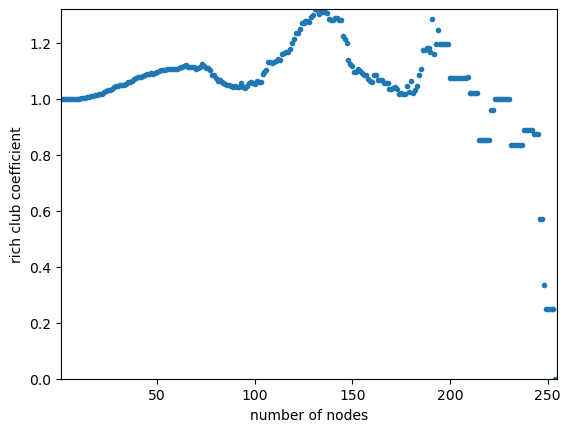

In [24]:
print(nx.number_of_selfloops(G))
rich=nx.rich_club_coefficient(G.to_undirected(), normalized=True, Q=60, seed=None)
print(rich)

x, y = zip(*rich.items())                                                      

plt.figure(1)   

    # prep axes   
plt.xlabel('number of nodes')                                                                                                             
plt.xscale('linear')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('rich club coefficient')                                                                                                          
plt.yscale('linear')                                                                                                                
plt.ylim(0, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

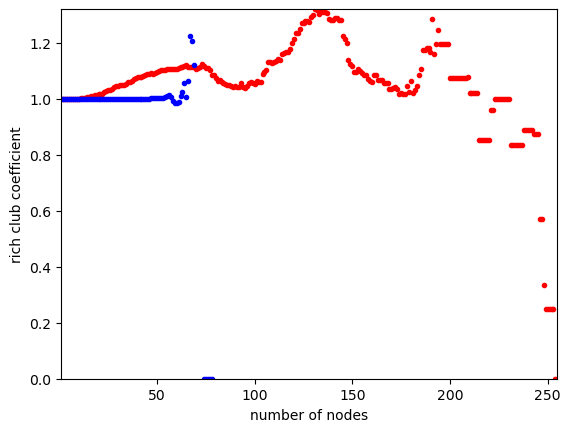

In [27]:
rich2=nx.rich_club_coefficient(er_mreza,normalized=True,Q=60,seed=None)
x, y = zip(*rich.items())                                                      
x1,y1=zip(*rich2.items())
plt.figure(1)   

    # prep axes   
plt.xlabel('number of nodes')                                                                                                             
plt.xscale('linear')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('rich club coefficient')                                                                                                          
plt.yscale('linear')                                                                                                                
plt.ylim(0, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.',color='r')    
plt.scatter(x1, y1, marker='.',color='b')                                                                                                      
plt.show()

In [68]:
#Asortativnost
#netezinska
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.0021791036302573922
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.005115607514582017


Text(0.5, 1.0, 'pModel')

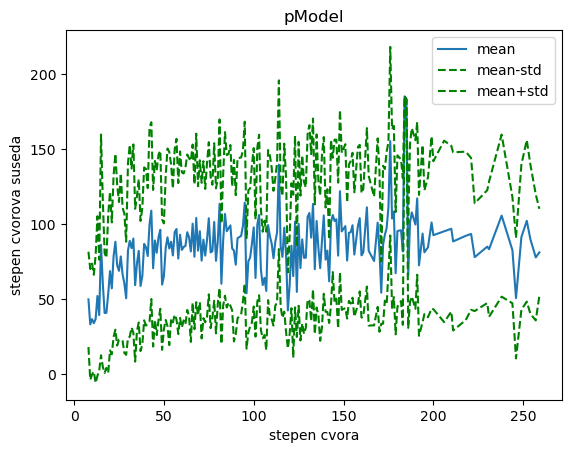

In [26]:
dict_degree = {}
for node in G.nodes():
    
    w = G.degree(nbunch= node)
    G.neighbors(node)
    for neigh_node in G.neighbors(node):
        if w in dict_degree:
            dict_degree[w].append(G.degree(neigh_node))
        else:
            dict_degree[w] = [G.degree(neigh_node)]

d = []
for k in dict_degree:
    m = np.array(dict_degree[k]).mean()
    s = np.array(dict_degree[k]).std()
    d.append([k, m, s])
d = np.array(d)

index = np.argsort(d[:, 0])
d[:, 0] = d[index, 0]
d[:, 1] = d[index, 1]
d[:, 2] = d[index, 2]

plt.plot(d[:, 0], d[:, 1], label='mean')
plt.plot(d[:, 0], d[:, 1] - d[:, 2], linestyle='--', color='g', label = 'mean-std')
plt.plot(d[:, 0], d[:, 1] + d[:, 2], linestyle='--', color = 'g', label='mean+std')
plt.legend()
plt.xlabel('stepen cvora')
plt.ylabel('stepen cvorova suseda')
plt.title('pModel')

In [69]:
#funkcija za iscrtavanje grafa raspodele cvorova po stepenu
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({24: 151, 30: 91, 38: 76, 25: 76, 51: 72, 26: 69, 22: 67, 20: 64, 23: 63, 14: 58, 41: 56, 39: 55, 28: 54, 32: 54, 35: 52, 12: 52, 29: 51, 33: 47, 36: 46, 27: 45, 44: 42, 13: 41, 56: 40, 47: 36, 21: 36, 52: 35, 46: 35, 64: 35, 61: 34, 37: 32, 53: 32, 11: 32, 15: 32, 40: 31, 18: 29, 62: 28, 55: 28, 59: 27, 63: 27, 16: 27, 67: 27, 68: 27, 17: 27, 54: 26, 34: 25, 93: 25, 31: 25, 42: 25, 10: 25, 97: 24, 60: 23, 70: 23, 78: 22, 45: 22, 75: 21, 80: 21, 73: 20, 104: 20, 83: 20, 48: 19, 71: 18, 50: 18, 19: 18, 57: 17, 81: 17, 43: 16, 94: 15, 58: 14, 134: 14, 66: 14, 102: 13, 79: 13, 65: 13, 74: 13, 91: 12, 133: 12, 96: 12, 72: 12, 77: 11, 99: 11, 129: 11, 103: 11, 121: 10, 101: 10, 107: 10, 9: 9, 118: 9, 114: 9, 145: 8, 49: 7, 76: 7, 86: 7, 179: 7, 138: 7, 147: 7, 87: 7, 8: 7, 85: 6, 88: 6, 148: 6, 84: 6, 69: 6, 95: 6, 130: 6, 124: 6, 90: 5, 110: 5, 135: 5, 151: 5, 105: 5, 115: 5, 127: 5, 143: 5, 82: 5, 125: 5, 132: 5, 111: 4, 100: 4, 89: 4, 98: 4, 156: 4, 174: 4, 117: 4, 113: 4, 108: 4

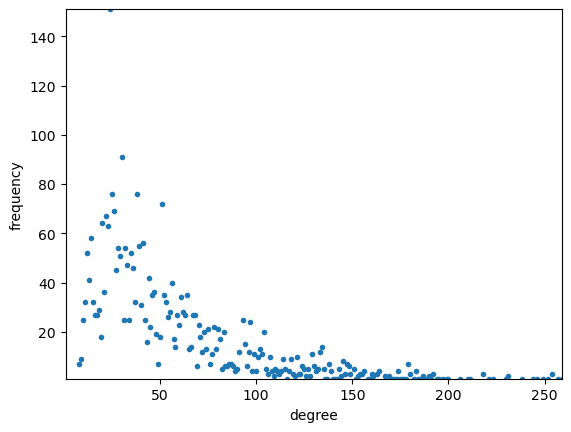

In [70]:
from collections import Counter
from operator import itemgetter
plot_deg_frequency(G,xscale='linear', yscale='linear')



Counter({24: 149, 30: 88, 22: 84, 25: 76, 51: 74, 38: 68, 26: 65, 41: 63, 20: 58, 23: 55, 32: 52, 14: 50, 29: 49, 28: 49, 39: 47, 13: 41, 12: 38, 33: 37, 53: 35, 21: 35, 36: 34, 55: 34, 58: 33, 62: 33, 11: 32, 70: 32, 103: 30, 15: 30, 37: 29, 46: 28, 57: 27, 88: 26, 18: 26, 56: 25, 31: 25, 10: 25, 48: 24, 27: 24, 106: 24, 43: 23, 34: 23, 77: 23, 54: 23, 90: 22, 63: 22, 40: 22, 78: 22, 85: 22, 86: 21, 52: 21, 64: 21, 17: 21, 67: 20, 16: 20, 96: 20, 44: 19, 65: 18, 124: 18, 82: 16, 45: 16, 50: 16, 68: 15, 66: 14, 119: 14, 108: 14, 61: 14, 60: 14, 102: 14, 100: 13, 112: 13, 72: 13, 19: 13, 35: 12, 81: 12, 79: 12, 71: 12, 221: 12, 98: 11, 80: 11, 110: 11, 47: 11, 75: 11, 49: 11, 42: 11, 132: 10, 95: 10, 229: 10, 104: 9, 9: 9, 207: 9, 59: 9, 166: 9, 196: 9, 139: 9, 230: 9, 128: 8, 83: 8, 109: 8, 222: 8, 157: 8, 92: 8, 217: 8, 240: 8, 122: 7, 99: 7, 89: 7, 91: 7, 127: 7, 76: 7, 195: 7, 167: 7, 118: 7, 161: 7, 97: 7, 214: 7, 155: 7, 8: 7, 142: 6, 146: 6, 180: 6, 107: 6, 74: 6, 208: 6, 126: 6,

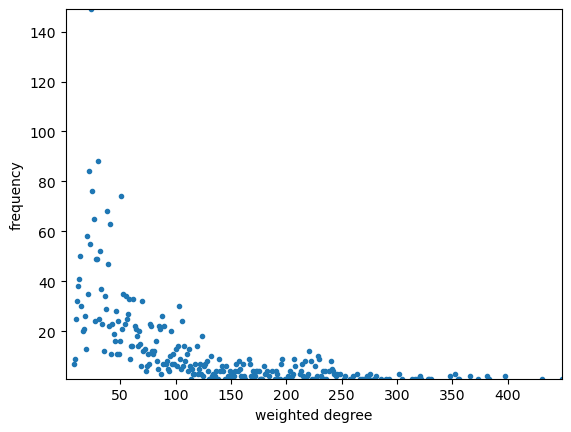

In [71]:
plot_deg_frequency(G,weighted=True,xscale='linear',yscale='linear')

In [39]:
#funkcija za izracunavanje centralnosti
def calculate_centralities(G):
  
    IDC_dict = nx.in_degree_centrality(G)
    ODC_dict= nx.out_degree_centrality(G)
    CC_dict = nx.closeness_centrality(G)
    BC_dict = nx.betweenness_centrality(G)
    EVC_dict = nx.eigenvector_centrality(G,weight='weight')
    DC_dict= nx.degree_centrality(G)
    df0=  pd.DataFrame.from_dict(IDC_dict, orient='index', columns=['IDC'])
    df1 = pd.DataFrame.from_dict(ODC_dict, orient='index', columns=['ODC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df5=pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df = pd.concat([df0,df1, df2, df3, df4,df5], axis=1)
 
    #df['stop_id'] = data.index
    df=df.reset_index()
    df=df.rename(columns = {'index':'stop_id'})
    df= df.merge(dataStops)
    df= df[['stop_id','stop_name','IDC','ODC','CC','BC','EVC','DC']]
    return df

In [40]:
#Tabela sa informacijama o centralnosti cvorova
data=calculate_centralities(G)

#print(data)

In [41]:
import scipy.stats as stats
labele = ['IDC','ODC', 'CC', 'BC', 'EVC','DC']
cross_correlation_matrix = pd.DataFrame(columns = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'], index = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'])
p_val_matrix = pd.DataFrame(columns = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'], index = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'])

for ind in labele:
    for col in labele:
        cross_correlation_matrix[ind][col], p_val_matrix[ind][col] =  stats.kendalltau(data[ind], data[col])
        
print(cross_correlation_matrix)

          IDC       ODC        CC        BC       EVC        DC
IDC       1.0  0.022508  0.540357  0.416457   0.62301  0.518146
ODC  0.022508       1.0  0.059008  0.433314  0.050187   0.52041
CC   0.540357  0.059008       1.0  0.395529  0.667871  0.383295
BC   0.416457  0.433314  0.395529       1.0  0.357092  0.576956
EVC   0.62301  0.050187  0.667871  0.357092       1.0  0.428273
DC   0.518146   0.52041  0.383295  0.576956  0.428273       1.0


In [21]:
#%pip install python-docx
import docx
import pandas as pd
#Ispis df-ova u dockx
# i am not sure how you are getting your data, but you said it is a
# pandas data frame
def df_toDocx(output,data):
    


    # open an existing document
    doc = docx.Document()

    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    t = doc.add_table(data.shape[0]+1, data.shape[1])

    # add the header rows.
    for j in range(data.shape[-1]):
        t.cell(0,j).text = data.columns[j]

# add the rest of the data frame
    for i in range(data.shape[0]):
        for j in range(data.shape[-1]):
            t.cell(i+1,j).text = str(data.values[i,j])

# save the doc
    print(doc)
    doc.save(output)

In [53]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 10
#display(data)
df_ = data
for metric in labele:
    df_[f"{metric}_rank"] = data[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['CC_rank'] * df_['BC_rank'] **1.5*df_['EVC_rank']*df_['ODC_rank']*df_['DC_rank']


df_.sort_values(['composite_rank'], ascending = True,inplace=True)
display(df_)
df_toDocx('./docks/P_Composite_centrality.docx',df_.head(100))
#df_.sort_values(['EVC'], ascending = False,inplace=True)
#df_.sort_values(['BC'], ascending = False, inplace=True)

#display(df_)

,stop_id,stop_name,IDC,ODC,CC,BC,EVC,DC,IDC_rank,ODC_rank,CC_rank,BC_rank,EVC_rank,DC_rank,composite_rank
453,495,Sajam,0.019262,0.059711,0.295065,0.028784,1.274530e-02,0.078973,322.0,3.0,154.0,1.0,760.0,8.0,2.808960e+06
117,148,Karađorđev Park,0.026003,0.056501,0.306806,0.027460,2.028170e-02,0.082504,128.5,6.0,70.0,4.0,512.0,2.0,3.440640e+06
331,373,Bulevar Maršala Tolbuhina,0.066132,0.017014,0.344999,0.007019,1.059790e-01,0.083146,1.0,442.5,1.0,121.0,7.0,1.0,4.122772e+06
118,149,Karađorđev Park,0.054896,0.026645,0.295625,0.015559,1.080019e-01,0.081541,10.0,105.5,145.0,29.0,6.0,4.0,5.733617e+07
116,147,Trg Slavija /Bulevar Oslobođenja/,0.053612,0.024719,0.288800,0.014220,1.375268e-01,0.078331,11.5,149.0,223.0,39.0,1.0,9.0,7.283339e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2625,Vojvode Vlahovića,0.001926,0.001284,0.146941,0.000000,2.285429e-08,0.003210,2548.5,2716.5,3081.0,2333.5,3111.0,3088.0,9.063385e+18
1322,1378,Janko Lisjak,0.003852,0.000642,0.143028,0.000000,1.792329e-07,0.004494,2053.5,2910.5,3088.0,2333.5,3090.0,2921.5,9.145785e+18
1256,1311,Vodovodna Stanica,0.002889,0.000642,0.152122,0.000000,5.464101e-06,0.003531,2306.5,2910.5,3044.5,2333.5,2999.0,3059.5,9.164784e+18
1323,1379,Blok Braća Marić,0.004173,0.000321,0.143047,0.000000,1.829515e-07,0.004494,1973.5,3039.5,3087.0,2333.5,3089.0,2921.5,9.544964e+18


In [30]:
df_.sort_values(['BC'], ascending = False,inplace=True)
df_toDocx('./docks/P_BC_centrality.docx',df_.head(100))
#df_.sort_values(['CC'], ascending = False,inplace=True)

#df_toDocx('./docks/P_CC_centrality.docx',df_.head(100))
#df_.sort_values(['DC'], ascending = False,inplace=True)
#df_toDocx('./docks/P_DC_centrality.docx',df_.head(100))
#df_.sort_values(['EVC'], ascending = False,inplace=True)
#df_toDocx('./docks/P_EVC_centrality.docx',df_.head(100))


In [ ]:
#%pip install powerlaw

import powerlaw
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
results = powerlaw.Fit(degree_sequence)

fit=powerlaw.Fit(degree_sequence,xmin=1)
fig2 = fit.plot_pdf(color='b', linewidth=2, label='target')
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2, label='power law')
fit.lognormal.plot_pdf(color='r', linestyle='--', ax=fig2, label='log normal')
fit.truncated_power_law.plot_pdf(color='y', linestyle='--', ax=fig2, label='truncated power law')
fig2.legend()
plt.xlabel('stepen cvora')
plt.ylabel('broj cvorova')
print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare('power_law', 'exponential')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare('power_law', 'truncated_power_law')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")

#fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
##fit.plot_pdf( color= 'b')
#plt.figure(figsize=(10, 6))
#fig2 = fit.plot_pdf(color='b', linewidth=2)
#fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
#fit.distribution_compare('power_law', 'lognormal')
##fig4 = fit.plot_ccdf(linewidth=3, color='black')
#fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
#fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
#fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--')


In [5]:
import math
def distance(lat1,lat2,lon1,lon2):
    lat1=lat1*math.pi/180
    lat2=lat2*math.pi/180
    lon1=lon1*math.pi/180
    lon2=lon2*math.pi/180
    t1=math.sin((lat1-lat2)/2)**2
    t2=math.sin((lon1-lon2)/2)**2
    R=6371
    d=2*R*math.asin(math.sqrt(t1+t2*math.cos(lat1)*math.cos(lat2)))
    return d 

In [6]:
def similarity(i,j):
    tip1=G.nodes[i]['tip'] 
    tip2=G.nodes[j]['tip']
    lat1=G.nodes[i]['lat']
    lat2=G.nodes[j]['lat']
    lon1=G.nodes[i]['lon']
    lon2=G.nodes[j]['lon']
    weight=1
    if (G.has_edge(i,j)):
            weight= G.edges[i,j]['weight']
    dist= distance(lat1,lat2,lon1,lon2)
    tipRank=1
   
    if (tip1=='tramvajska' and tip1==tip2):
        tipRank=4
    if (tip2=='trolejbuska' and tip1==tip2):
        tipRank=2
    if (tip1=='mesovita' and (tip1==tip2 or tip2=='tramvajska')):
        tipRank=1.5
   
    if dist < 0.1:
        distRank=10
    elif dist<0.5:
        distRank=8
    elif dist<1:
        distRank=6
    elif dist<1.5:
        distRank=5
    elif dist<2:
        distRank=4
    elif dist<3:
        distRank=3
    elif dist<5:
        distRank=2
    elif dist<10:
        distRank=1.5
    else:
        distRank=1
    #ret=1/dist*math.sqrt(dist)*tipRank*(weight**2)
    #distRank = np.exp(-dist**2/(2))
    ret = distRank*tipRank*weight
    return ret 

In [7]:
for (x,y) in G.edges():
    G.edges[x,y]['rank']=similarity(x,y)


In [8]:
#Laplasijan matrica
L = nx.laplacian_matrix(G.to_undirected(),weight='rank').toarray()

<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [9]:
#pronalazenje sopstevnih vrednosit i sopstvenih vektora
l, v = np.linalg.eig(L)

In [10]:
#v = np.real(v)
#l = np.real(l)
x_axis = np.arange(l.shape[0])+1

sort = np.argsort(l)
l = l[sort]
v = v[:, sort]

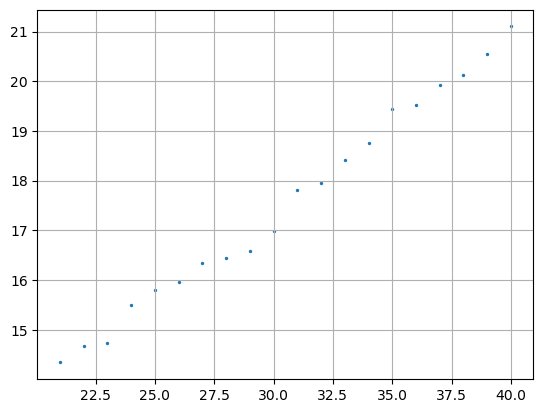

In [16]:
plt.grid('on')
plt.scatter(x_axis[20:40], l[20:40],s = 2)

In [59]:

# ekstrakcija dominantne komponente
import itertools
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
G2=G.to_undirected()
largest_cc = max(nx.connected_components(G2), key=len)
S = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
Gdom = G2.subgraph(largest_cc).copy()
print(f"Dominantna komponenta ima {len(Gdom.nodes())} čvorova i {len(Gdom.edges())} grana")
#G = Gdom

Dominantna komponenta ima 3116 čvorova i 82534 grana


In [63]:

def plot_and_save_dendrogram(G):

    plt.rcParams["figure.figsize"] = (24,13)
    # get Girvan-Newman communities list
    communities = list(nx.community.girvan_newman(G))

    # building initial dict of node_id to each possible subset:
    node_id = 0
    init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
    for comm in communities:
        for subset in list(comm):
            if subset not in init_node2community_dict.values():
                node_id += 1
                init_node2community_dict[node_id] = subset

    # turning this dictionary to the desired format in @mdml's answer
    node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
    for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
        for node_id_parent, group in init_node2community_dict.items():
            if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
                node_id_to_children[node_id_parent].append(node_id1)
                node_id_to_children[node_id_parent].append(node_id2)

    # also recording node_labels dict for the correct label for dendrogram leaves
    node_labels = dict()
    for node_id, group in init_node2community_dict.items():
        if len(group) == 1:
            node_labels[node_id] = list(group)[0]
        else:
            node_labels[node_id] = ''

    # also needing a subset to rank dict to later know within all k-length merges which came first
    subset_rank_dict = dict()
    rank = 0
    for e in communities[::-1]:
        for p in list(e):
            if tuple(p) not in subset_rank_dict:
                subset_rank_dict[tuple(sorted(p))] = rank
                rank += 1
    subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

    # my function to get a merge height so that it is unique (probably not that efficient)
    def get_merge_height(sub):
        sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
        n = len(sub_tuple)
        other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
        min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
        range = (max_rank-min_rank) if max_rank > min_rank else 1
        return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

    # finally using @mdml's magic, slightly modified:
    G           = nx.DiGraph(node_id_to_children)
    nodes       = G.nodes()
    leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
    inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

    # Compute the size of each subtree
    subtree = dict( (n, [n]) for n in leaves )
    for u in inner_nodes:
        children = set()
        node_list = list(node_id_to_children[u])
        while len(node_list) > 0:
            v = node_list.pop(0)
            children.add( v )
            node_list += node_id_to_children[v]
        subtree[u] = sorted(children & leaves)

    inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

    # Construct the linkage matrix
    leaves = sorted(leaves)
    index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
    Z = []
    k = len(leaves)
    for i, n in enumerate(inner_nodes):
        children = node_id_to_children[n]
        x = children[0]
        for y in children[1:]:
            z = tuple(sorted(subtree[x] + subtree[y]))
            i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
            Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
            index[z] = k
            subtree[z] = list(z)
            x = z
            k += 1

    # dendrogram
    plt.figure()
    dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
    plt.savefig('dendrogram.png')

In [64]:
plot_and_save_dendrogram(Gdom)

KeyboardInterrupt: 

In [17]:
k = 30
vk = v[:,:k]

In [18]:
 from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k).fit(vk)
nodes= list(G.nodes)
for i in range(len(kmeans.labels_)):
              G.nodes[nodes[i]]['spektralniKlaster']=kmeans.labels_[i]


In [13]:
#nalazenje tacka dijametera mreze
s= set(G.nodes)
maxx=0
for i in s:
    for j in s:
        novo=nx.shortest_path_length(G,source=i,target=j)
        if(novo>maxx):
            maxx=novo
            print(novo,i,j)

1 1 2
4 1 3
5 1 60
6 1 236
7 1 297
8 1 1286
9 1 1302
10 3 1302


KeyboardInterrupt: 

In [14]:
#print(nx.shortest_path(G,source=3,target=1302))

[3, 1, 2, 146, 891, 554, 769, 1297, 1298, 1315, 1302]


In [19]:
#print(G.edges)
#list_stops = set(dataStops['stop_id'].unique())
output_path = 'models/directed_p_graph.gexf'

nx.write_gexf(G, output_path)
#print(list_stops)